In [1]:
import pandas as pd

In [2]:
compras = pd.read_excel('./data/compras.xls',
                   sheet_name='compras',
                   header=0)
compras.head()


,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97
1,2,1032.0,4,9.99,39.96
2,3,1049.0,2,5.99,NaN
3,4,1021.0,4,3.99,15.96
4,5,1001.0,4,22.00,88.00


In [3]:
json_df = pd.read_json('./data/clientes.json')
json_df.head()

,cliente
0,"{'cod_cliente': 1, 'sexo': 1, 'idade': 26, 'qt..."
1,"{'cod_cliente': 2, 'sexo': 1, 'idade': 58, 'qt..."
2,"{'cod_cliente': 3, 'sexo': 1, 'idade': 63, 'qt..."
3,"{'cod_cliente': 4, 'sexo': 1, 'idade': 58, 'qt..."
4,"{'cod_cliente': 5, 'sexo': 0, 'idade': 70, 'qt..."


In [4]:
import pandas as pd
import json

with open('./data/clientes.json') as file:
    data = json.load(file)

clientes = data['cliente']
clientes = pd.json_normalize(clientes)
clientes.head()


,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0
2,3,1,63,1,3,11,1,1
3,4,1,58,2,2,11,1,1
4,5,0,70,0,1,5,0,1


In [5]:
import requests
from bs4 import BeautifulSoup

# GET request
url = "https://profleandrolessa.wordpress.com/exercicio-de-coleta-de-dados/"
response = requests.get(url)

# BeautifulSoup object to parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the product data
table = soup.find('table')

# Extract the table headers
headers = [header.text for header in table.find_all('td')]

# Extract the table rows
rows = table.find_all('tr')[1:]  # Exclude the header row

# Extract the product data from each row
products = []
for row in rows:
    data = [cell.text for cell in row.find_all('td')]
    product = dict(zip(headers, data))
    products.append(product)


In [6]:
products[:3]

[{'cod_produto': '1000',
  'nome_produto': 'Sabão em pó',
  'cod_classe_produto': '1',
  'classe_produto': 'Produtos de Limpeza',
  'valor': '9,9'},
 {'cod_produto': '1001',
  'nome_produto': 'Amaciante',
  'cod_classe_produto': '1',
  'classe_produto': 'Produtos de Limpeza',
  'valor': '22'},
 {'cod_produto': '1002',
  'nome_produto': 'Detergente',
  'cod_classe_produto': '1',
  'classe_produto': 'Produtos de Limpeza',
  'valor': '1,99'}]

In [7]:
produtos = pd.DataFrame(products)
produtos.head()

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,"9,9"
1,1001,Amaciante,1,Produtos de Limpeza,22
2,1002,Detergente,1,Produtos de Limpeza,"1,99"
3,1003,Água sanitária,1,Produtos de Limpeza,12
4,1004,Esponja de aço,1,Produtos de Limpeza,4


In [8]:
produtos.shape

(87, 5)

In [9]:
produtos['cod_produto'] = produtos['cod_produto'].astype(int)

In [10]:
produtos.loc[produtos['classe_produto'] == 'Bebidas', 'valor']

17     7,5
18    4,99
19     4,5
20     2,5
21    3,99
22     4,3
Name: valor, dtype: object

In [11]:
produtos['valor'] = produtos['valor'].str.replace(',', '.').astype(float)

In [12]:
produtos.loc[produtos['classe_produto'] == 'Bebidas', 'valor'].mean()


4.630000000000001

In [13]:
with open('./data/estados.txt', encoding='latin-1') as file:
    estados = file.readlines()

estados = [estado.strip().split('|') for estado in estados]
estados_df = pd.DataFrame(estados[1:], columns=estados[0])

estados_df.head(5)

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC
1,2,Alagoas,AL
2,3,Amapá,AP
3,4,Amazonas,AM
4,5,Bahia,BA


In [14]:
estados_df['codigo_estado'] = estados_df['codigo_estado'].astype(int)

Cleaning Data

In [15]:
df = pd.merge(clientes, compras, on='cod_cliente')
df = pd.merge(df, produtos, on='cod_produto')
df = pd.merge(df, estados_df, left_on = 'cod_estado', right_on = 'codigo_estado')

df.head()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,codigo_estado,nome_estado,sgl_estado
0,1,1,26,2,3,13,0,1,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,13,Minas Gerais,MG
1,1973,1,36,1,1,13,0,1,1049.0,3,5.99,17.97,Leite em pó,3,Alimentação,5.99,13,Minas Gerais,MG
2,2658,0,58,1,0,13,1,1,1049.0,4,5.99,23.96,Leite em pó,3,Alimentação,5.99,13,Minas Gerais,MG
3,593,1,18,3,0,13,1,0,1001.0,3,22.00,66.00,Amaciante,1,Produtos de Limpeza,22.00,13,Minas Gerais,MG
4,647,1,67,1,1,13,0,1,1001.0,4,22.00,88.00,Amaciante,1,Produtos de Limpeza,22.00,13,Minas Gerais,MG


In [16]:
organized_order = ['cod_cliente', 'sexo', 'idade', 'estado_civil', 'hipertenso', 'diabetes', 'qtd_filhos', 'nome_estado', 'cod_estado', 'sgl_estado', 'cod_produto', 'nome_produto', 'cod_classe_produto', 'classe_produto', 'valor_unitario', 'qtd_produto', 'valor_total_compra']
df = df.reindex(columns=organized_order)
df.head()

,cod_cliente,sexo,idade,estado_civil,hipertenso,diabetes,qtd_filhos,nome_estado,cod_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor_unitario,qtd_produto,valor_total_compra
0,1,1,26,3,0,1,2,Minas Gerais,13,MG,1011.0,Lustra móveis,1,Produtos de Limpeza,5.99,3,17.97
1,1973,1,36,1,0,1,1,Minas Gerais,13,MG,1049.0,Leite em pó,3,Alimentação,5.99,3,17.97
2,2658,0,58,0,1,1,1,Minas Gerais,13,MG,1049.0,Leite em pó,3,Alimentação,5.99,4,23.96
3,593,1,18,0,1,0,3,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.00,3,66.00
4,647,1,67,1,0,1,1,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.00,4,88.00


In [17]:
df.isnull().sum()

cod_cliente            0
sexo                   0
idade                  0
estado_civil           0
hipertenso             0
diabetes               0
qtd_filhos             0
nome_estado            0
cod_estado             0
sgl_estado             0
cod_produto            0
nome_produto           0
cod_classe_produto     0
classe_produto         0
valor_unitario         5
qtd_produto            0
valor_total_compra    21
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,cod_cliente,sexo,idade,estado_civil,hipertenso,diabetes,qtd_filhos,nome_estado,cod_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor_unitario,qtd_produto,valor_total_compra
138,574,1,75,2,1,0,3,Goiás,9,GO,1077.0,Queijo outros,5,Carnes e Frios,NaN,1,34.50
237,7,1,31,3,1,1,1,Paraná,16,PR,1069.0,Melão,4,Hortifruti,3.49,2,NaN
320,462,0,35,0,0,1,2,Paraná,16,PR,1061.0,Chuchu,4,Hortifruti,5.99,2,NaN
394,147,1,66,2,1,1,0,Rondônia,22,RO,1056.0,Tomate,4,Hortifruti,3.75,3,NaN
401,449,1,58,2,1,0,1,Rondônia,22,RO,1033.0,Farofa pronta,3,Alimentação,NaN,2,4.64
477,260,1,32,1,1,1,0,Santa Catarina,24,SC,1082.0,Peixe,5,Carnes e Frios,29.99,1,NaN
578,692,1,56,0,0,0,2,Pernambuco,17,PE,1040.0,Maionese,3,Alimentação,NaN,2,10.00
670,3,1,63,3,1,1,1,Mato Grosso,11,MT,1049.0,Leite em pó,3,Alimentação,5.99,2,NaN
697,689,1,53,0,0,1,0,Mato Grosso,11,MT,1028.0,Sal,3,Alimentação,3.20,4,NaN
1202,659,1,71,3,1,1,3,Roraima,23,RR,1030.0,Achocolatado,3,Alimentação,8.00,2,NaN


In [19]:
df['valor_total_compra'] = df['valor_total_compra'].fillna(df['qtd_produto'] * df['valor_unitario'])
df['valor_unitario'] = df['valor_unitario'].fillna(df['valor_total_compra'] / df['qtd_produto'])

In [20]:
df[df.isnull().any(axis=1)]

,cod_cliente,sexo,idade,estado_civil,hipertenso,diabetes,qtd_filhos,nome_estado,cod_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor_unitario,qtd_produto,valor_total_compra


histograma de distribuição de idades das pessoas que são hipertensas e que realizaram compra de produtos da classe "Produtos de Limpeza". Considere um gráfico de barras com 20 colunas.

In [21]:
hiper_limp = df.loc[(df['classe_produto'] == 'Produtos de Limpeza') & (df['hipertenso'] == 1)]
hiper_limp.head()

,cod_cliente,sexo,idade,estado_civil,hipertenso,diabetes,qtd_filhos,nome_estado,cod_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor_unitario,qtd_produto,valor_total_compra
3,593,1,18,0,1,0,3,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.0,3,66.0
5,1175,1,68,1,1,1,1,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.0,3,66.0
23,1603,0,65,2,1,1,2,Minas Gerais,13,MG,1016.0,Saco de lixo 50l,1,Produtos de Limpeza,15.0,2,30.0
24,2153,1,47,3,1,1,3,Minas Gerais,13,MG,1016.0,Saco de lixo 50l,1,Produtos de Limpeza,15.0,1,15.0
25,2768,0,67,1,1,0,0,Minas Gerais,13,MG,1016.0,Saco de lixo 50l,1,Produtos de Limpeza,15.0,3,45.0


In [22]:
histo_df = hiper_limp[['idade', 'valor_total_compra']]

array([[<Axes: title={'center': 'idade'}>]], dtype=object)

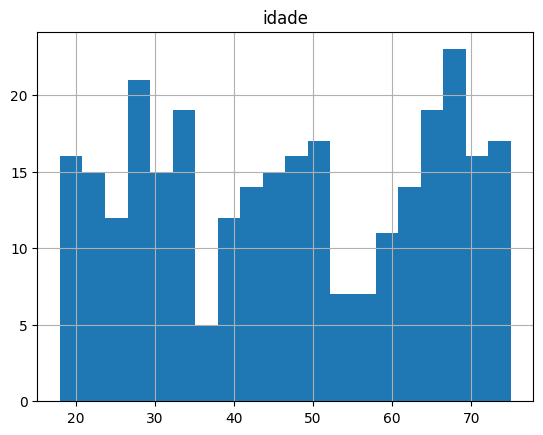

In [23]:
histo_df.hist('idade', bins=20)

5. proporção de homens e mulheres hipertensos

In [24]:
proporcao = hiper_limp['sexo'].value_counts(normalize=True)
proporcao.index = proporcao.index.map({0: 'feminino', 1: 'masculino'}.get)
proporcao

masculino    0.505155
feminino     0.494845
Name: sexo, dtype: float64

In [25]:
propor = hiper_limp.groupby('sexo')['idade'].count() / hiper_limp.shape[0]
propor.index = propor.index.map({0: 'feminino', 1: 'masculino'}.get)
propor

sexo
feminino     0.494845
masculino    0.505155
Name: idade, dtype: float64

algoritmo de agrupamento

In [26]:
dados_calc = df[['cod_cliente', 'idade', 'valor_total_compra']]

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(X=dados_calc[['idade', 'valor_total_compra']])
dados_calc['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_


/home/wedivv/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13988/4203011118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_calc['cluster'] = kmeans.labels_


In [29]:
dados_calc['cluster'].value_counts()

2    1368
0    1360
3     208
1      54
Name: cluster, dtype: int64

6. gráfico de análise de clusters com os centroides

In [30]:
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objects as go

In [31]:
grafico_centroide = px.scatter(x = dados_calc['idade'],
                                y = dados_calc['valor_total_compra'],
                                color= dados_calc['cluster'])
grafico_centroide.add_scatter(x=centroids[:,0], y=centroids[:,1], mode="markers",
                marker=dict(size=22, color="royalblue"))

grafico_centroide.update_layout(title="Cluster Analysis", xaxis_title="Idade", yaxis_title="Valor Total Compra")

![plot_idade_valortotal.png](img/idade_valortc_plot.png)

In [32]:
dados_calc.groupby('cluster')['valor_total_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1360.0,13.998213,10.263399,1.25,6.00,11.96,17.9800,50.00
1,54.0,186.031296,38.863936,138.00,140.00,194.97,219.7125,259.96
2,1368.0,13.052661,9.451013,1.25,5.99,11.00,17.6700,48.00
3,208.0,78.078125,24.235610,45.00,56.99,69.00,90.0000,129.98


In [33]:
dados_calc['valor_total_compra'][dados_calc['cluster'] == 2].describe()


count    1368.000000
mean       13.052661
std         9.451013
min         1.250000
25%         5.990000
50%        11.000000
75%        17.670000
max        48.000000
Name: valor_total_compra, dtype: float64

In [34]:
dados_calc[dados_calc['cluster'] == 0]

,cod_cliente,idade,valor_total_compra,cluster
0,1,26,17.97,0
1,1973,36,17.97,0
6,2510,29,24.00,0
7,2993,38,6.98,0
8,346,26,9.75,0
...,...,...,...,...
2973,2653,43,6.00,0
2976,555,22,17.97,0
2979,2014,25,11.98,0
2982,2553,38,2.50,0


In [35]:
dados_calc.groupby('cluster')['valor_total_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1360.0,13.998213,10.263399,1.25,6.00,11.96,17.9800,50.00
1,54.0,186.031296,38.863936,138.00,140.00,194.97,219.7125,259.96
2,1368.0,13.052661,9.451013,1.25,5.99,11.00,17.6700,48.00
3,208.0,78.078125,24.235610,45.00,56.99,69.00,90.0000,129.98


8. diagrama de boxplot entre as variáveis idade e cluster.

In [36]:
import plotly.express as px

# Create the boxplot with inverted axes
diag = px.box(dados_calc, x="idade", y="cluster", color="cluster", orientation="h")

# Display the inverted boxplot
diag.show()


9. Qual é a quantidade de solteiros e hipertensos que estão presentes no cluster de identificador 3?

In [37]:
merged_df = pd.merge(df, dados_calc, on='cod_cliente')

In [38]:
cluster0 = merged_df[merged_df['cluster'] == 0]
cluster0.query("hipertenso == 1 and estado_civil == 0").count()

cod_cliente             160
sexo                    160
idade_x                 160
estado_civil            160
hipertenso              160
diabetes                160
qtd_filhos              160
nome_estado             160
cod_estado              160
sgl_estado              160
cod_produto             160
nome_produto            160
cod_classe_produto      160
classe_produto          160
valor_unitario          160
qtd_produto             160
valor_total_compra_x    160
idade_y                 160
valor_total_compra_y    160
cluster                 160
dtype: int64

In [39]:
solt_hiper = merged_df[(merged_df['estado_civil'] == 0) & (merged_df['hipertenso'] == 1) & (merged_df['cluster'] == 0)]
solt_hiper['idade_x'].describe()


count    160.000000
mean      31.912500
std        8.330732
min       18.000000
25%       24.750000
50%       33.000000
75%       38.000000
max       46.000000
Name: idade_x, dtype: float64

In [40]:
solt = merged_df[(merged_df['estado_civil'] == 0) & (merged_df['cluster'] == 0)]
solt['idade_x'].describe()


count    323.000000
mean      32.170279
std        8.084883
min       18.000000
25%       26.000000
50%       33.000000
75%       38.500000
max       46.000000
Name: idade_x, dtype: float64

In [41]:
hiper = merged_df[(merged_df['hipertenso'] == 1) & (merged_df['cluster'] == 0)]
hiper['idade_x'].describe()


count    694.000000
mean      31.863112
std        8.416297
min       18.000000
25%       25.000000
50%       32.000000
75%       39.000000
max       46.000000
Name: idade_x, dtype: float64

10. Qual é o número total e a média de idade para o grupo de não diabéticos para o cluster de identificador 3?

In [42]:
cluster0_10 = merged_df[merged_df['cluster'] == 2]
cluster0_10.query("diabetes == 0").describe()

,cod_cliente,sexo,idade_x,estado_civil,hipertenso,diabetes,qtd_filhos,cod_estado,cod_produto,valor_unitario,qtd_produto,valor_total_compra_x,idade_y,valor_total_compra_y,cluster
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.0,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0
mean,1502.643275,0.504386,61.203216,1.445906,0.486842,0.0,1.508772,13.476608,1040.480994,5.816637,2.388889,12.785015,61.203216,12.785015,2.0
std,889.390430,0.500347,8.078744,1.067967,0.500193,0.0,1.116197,7.808715,23.200342,4.813505,1.126388,9.306842,8.078744,9.306842,0.0
min,2.000000,0.000000,47.000000,0.000000,0.000000,0.0,0.000000,1.000000,1000.000000,1.250000,1.000000,1.250000,47.000000,1.250000,2.0
25%,700.750000,0.000000,55.000000,1.000000,0.000000,0.0,1.000000,7.000000,1021.000000,3.500000,1.000000,5.990000,55.000000,5.990000,2.0
50%,1479.500000,1.000000,61.000000,1.000000,0.000000,0.0,1.500000,14.000000,1040.000000,4.150000,2.000000,10.500000,61.000000,10.500000,2.0
75%,2342.500000,1.000000,68.000000,2.000000,1.000000,0.0,3.000000,20.000000,1059.000000,5.990000,3.000000,16.000000,68.000000,16.000000,2.0
max,2990.000000,1.000000,75.000000,3.000000,1.000000,0.0,3.000000,27.000000,1086.000000,35.000000,4.000000,48.000000,75.000000,48.000000,2.0


11. Quantos produtos distintos existem no dataset de mercado?

In [43]:
mercado_df = pd.read_csv('./data/mercado.csv', sep=';', index_col=0)
mercado_df.head()

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
Id,,,,,,,,,,,,,,,,,,,,
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
distinct_products = mercado_df.stack().unique()
distinct_products_df = pd.DataFrame(distinct_products, columns=['Distinct Products'])
distinct_products_df

,Distinct Products
0,shrimp
1,almonds
2,avocado
3,vegetables mix
4,green grapes
...,...
115,burger sauce
116,oatmeal
117,asparagus
118,cream


In [45]:
all_products = mercado_df.iloc[:, 1:].values.flatten()
distinct_products = pd.unique(all_products)
distinct_products

array(['almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil', 'meatballs', 'eggs', nan, 'milk',
       'energy bar', 'whole wheat rice', 'french fries', 'light cream',
       'shallot', 'spaghetti', 'pet food', 'burgers', 'cooking oil',
       'champagne', 'cookies', 'chocolate', 'chicken', 'oil',
       'fresh tuna', 'tomatoes', 'black tea', 'extra dark chocolate',
       'protein bar', 'shrimp', 'pasta', 'pepper', 'shampoo',
       'sparkling water', 'ham', 'body spray', 'pancakes',
       'grated cheese', 'white wine', 'toothpaste', 'soup', 'fresh bread',
       'escalope', 'tomato sauce', 'magazines', 'strawberries',
       'strong cheese', 'ground beef', 'cake', 'frozen vegetables',
       'hot dogs', 'brownies', 'cereals', 'clothes acces

there is a nan between eggs and milk

In [46]:
len(distinct_products)-1

120

In [47]:
df

,cod_cliente,sexo,idade,estado_civil,hipertenso,diabetes,qtd_filhos,nome_estado,cod_estado,sgl_estado,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor_unitario,qtd_produto,valor_total_compra
0,1,1,26,3,0,1,2,Minas Gerais,13,MG,1011.0,Lustra móveis,1,Produtos de Limpeza,5.99,3,17.97
1,1973,1,36,1,0,1,1,Minas Gerais,13,MG,1049.0,Leite em pó,3,Alimentação,5.99,3,17.97
2,2658,0,58,0,1,1,1,Minas Gerais,13,MG,1049.0,Leite em pó,3,Alimentação,5.99,4,23.96
3,593,1,18,0,1,0,3,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.00,3,66.00
4,647,1,67,1,0,1,1,Minas Gerais,13,MG,1001.0,Amaciante,1,Produtos de Limpeza,22.00,4,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2992,1,26,3,0,0,3,Ceará,6,CE,1076.0,Queijo Mussarela,5,Carnes e Frios,29.99,2,59.98
2986,674,1,69,2,0,1,2,Ceará,6,CE,1057.0,Cenoura,4,Hortifruti,2.99,4,11.96
2987,1335,0,55,3,0,1,3,Ceará,6,CE,1005.0,Buchinha de pia,1,Produtos de Limpeza,2.50,1,2.50
2988,1503,0,69,3,0,1,2,Ceará,6,CE,1005.0,Buchinha de pia,1,Produtos de Limpeza,2.50,3,7.50


12. Através algoritmo apriori, gere os itens mais frequentes no dataset de mercado. Utilize o parâmetro min_support=0.2 e responda: qual é a quantidade de itens frequentes foram criados?

13. Gere itens frequentes com o suporte mínimo de 0,05 e após utilize o algoritmo association_rules, crie as regras de associação considerando, metric='confidence' e min_threshold=0.25 e responda: qual regra possui menor confiança?

14. Qual o LIFT da regra: Se (eggs) então (mineral water)?

15. Qual o número de compras que foram realizadas contendo chocolate e mineral water na mesma compra?

In [48]:
mercado_df

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
Id,,,,,,,,,,,,,,,,,,,,
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
mercado_df[(mercado_df == "mineral water").any(axis=1) & (mercado_df == "chocolate").any(axis=1)]

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
Id,,,,,,,,,,,,,,,,,,,,
28,mineral water,eggs,chicken,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,mineral water,chocolate,avocado,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,turkey,fresh tuna,frozen vegetables,tomatoes,ground beef,spaghetti,mineral water,chocolate,soup,milk,olive oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,mineral water,chocolate,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,mineral water,barbecue sauce,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7471,mineral water,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7472,chocolate,grated cheese,mineral water,olive oil,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7474,turkey,shrimp,pasta,mineral water,chocolate,milk,salmon,vegetables mix,muffins,eggs,sparkling water,gluten free bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
